In [1]:
from PIL import Image
import os
import numpy as np

# Ruta a la carpeta que contiene las imágenes
folder_path = 'Imagenes'

# Lista para almacenar las imágenes cargadas
image_list = []

# Lista para almacenar las categorias por numeros para que la maquina pueda reconocerlos
image_diferenciada = []

# Recorre todos los archivos de la carpeta
for filename in os.listdir(folder_path):

    if 'Perro' in filename:
      image_diferenciada.append(0)
    elif 'Persona' in filename:
      image_diferenciada.append(1)
    elif 'Mono' in filename:
      image_diferenciada.append(2)

    if filename.endswith(".jpg") or filename.endswith(".png"):
        img_path = os.path.join(folder_path, filename) # fucion ruta de la carpeta de las imagenes + el recorrido activo del for filename activamente
        img = Image.open(img_path)
        img = img.resize((224, 224))  # Redimensiona la imagen
        img_array = np.array(img) / 255.0  # Normaliza los valores de píxeles
        image_list.append(img_array)
        print(f'{filename} | nomralizacion y redimension {np.array(img).shape}')
print('')
print(f'Lista categorizada => {image_diferenciada}')
print(f"Tamaño de image_list: {len(image_list)}")
print(f"Tamaño de image_diferenciada: {len(image_diferenciada)}")


Mono1.jpg | nomralizacion y redimension (224, 224, 3)
Mono10.jpg | nomralizacion y redimension (224, 224, 3)
Mono2.jpg | nomralizacion y redimension (224, 224, 3)
Mono3.jpg | nomralizacion y redimension (224, 224, 3)
Mono4.jpg | nomralizacion y redimension (224, 224, 3)
Mono5.jpg | nomralizacion y redimension (224, 224, 3)
Mono6.jpg | nomralizacion y redimension (224, 224, 3)
Mono7.jpg | nomralizacion y redimension (224, 224, 3)
Mono8.jpg | nomralizacion y redimension (224, 224, 3)
Mono9.jpg | nomralizacion y redimension (224, 224, 3)
Perro1.jpg | nomralizacion y redimension (224, 224, 3)
Perro10.jpg | nomralizacion y redimension (224, 224, 3)
Perro2.jpg | nomralizacion y redimension (224, 224, 3)
Perro3.jpg | nomralizacion y redimension (224, 224, 3)
Perro4.jpg | nomralizacion y redimension (224, 224, 3)
Perro5.jpg | nomralizacion y redimension (224, 224, 3)
Perro6.jpg | nomralizacion y redimension (224, 224, 3)
Perro7.jpg | nomralizacion y redimension (224, 224, 3)
Perro8.jpg | nomra

In [2]:
from sklearn.model_selection import train_test_split
# test_size=0.3: Indica que el 30% de los datos se utilizarán como conjunto de prueba, y el 70% restante como conjunto de entrenamiento.

# random_state=42: Fija la semilla del generador aleatorio para que la división sea reproducible. El número 42 es arbitrario.

X_train, X_test, y_train, y_test = train_test_split(image_list, image_diferenciada, test_size=0.3, random_state=42, stratify=image_diferenciada)

In [3]:
import keras
from keras.models import Sequential # type: ignore
from keras.layers import Dense, Flatten # type: ignore

#Se establece una semilla para evitar distintos resultados
keras.utils.set_random_seed(812)
#Se establece un modelo neuronal
model = Sequential()
model.add(Flatten(input_shape=(224, 224, 3)))  # Aplanar la imagen
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax')) #3 es el numero de clases

c:\Users\mrpic\Escritorio\Reconocimiento_de_imagenes_Red_Neuronal_Multiclase\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
#Se compila el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
#Verificamos la estructura de salida esperada para entrenamiento
y_train

[2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 2, 0, 2, 1, 2, 2, 1, 2, 2, 1]

In [6]:
#Verificamos shape de imagenes
import numpy as np

for i, image in enumerate(X_train):
    print(f"Shape of image {i}: {np.array(image).shape}")

Shape of image 0: (224, 224, 3)
Shape of image 1: (224, 224, 3)
Shape of image 2: (224, 224, 3)
Shape of image 3: (224, 224, 3)
Shape of image 4: (224, 224, 3)
Shape of image 5: (224, 224, 3)
Shape of image 6: (224, 224, 3)
Shape of image 7: (224, 224, 3)
Shape of image 8: (224, 224, 3)
Shape of image 9: (224, 224, 3)
Shape of image 10: (224, 224, 3)
Shape of image 11: (224, 224, 3)
Shape of image 12: (224, 224, 3)
Shape of image 13: (224, 224, 3)
Shape of image 14: (224, 224, 3)
Shape of image 15: (224, 224, 3)
Shape of image 16: (224, 224, 3)
Shape of image 17: (224, 224, 3)
Shape of image 18: (224, 224, 3)
Shape of image 19: (224, 224, 3)
Shape of image 20: (224, 224, 3)


In [7]:
#Cambiamos la forma
X_train = np.array(X_train)
y_train = np.array(y_train)

In [8]:
y_train = keras.utils.to_categorical(y_train, num_classes=3)
y_train

array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [9]:
X_train.shape

(21, 224, 224, 3)

In [10]:
#Verificamos el cambio
y_train

array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [11]:
y_train.shape

(21, 3)

In [12]:
# Ajustamos("Entrenamos") el modelo al conjunto de datos cada que se ejecuta este; el modelo nos devulve el accuracy mas preciso; La pérdida (loss) es una medida ve que tan mal está el modelo en esa época. Un valor de 1.1341 indica cuán lejos está el modelo de las predicciones correctas, basándose en la función de pérdida que estás utilizando (en este caso, categorical_crossentropy).

%time model.fit(X_train,y_train,epochs=50)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 809ms/step - accuracy: 0.3333 - loss: 1.1720
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.3333 - loss: 57.1825
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.3333 - loss: 105.8432
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.3333 - loss: 21.0655
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.3333 - loss: 49.4536
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.3333 - loss: 51.8804
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.5714 - loss: 46.6100
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.6190 - loss: 39.4300
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.6667 - loss: 24.3821
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.5714 - loss: 10.6011
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.3333 - loss: 6.8472
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0

In [13]:
%time y_train

CPU times: total: 0 ns
Wall time: 0 ns


array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [14]:
import numpy as np

# Investigate the shapes of elements within X_test
for i, item in enumerate(X_test):
    print(f"Shape of item {i}: {np.array(item).shape}")

# Option 1: Pad images with fewer channels (if applicable)
target_channels = 3  # Set the desired number of channels
X_test_padded = []
for item in X_test:
    item_array = np.array(item)
    if item_array.shape[-1] < target_channels:
        padding_needed = target_channels - item_array.shape[-1]
        padding = [(0, 0)] * (item_array.ndim - 1) + [(0, padding_needed)]
        item_padded = np.pad(item_array, padding, mode='constant')
        X_test_padded.append(item_padded)
    else:
        X_test_padded.append(item_array)

X_test = np.array(X_test_padded)
y_test = np.array(y_test)


Shape of item 0: (224, 224, 3)
Shape of item 1: (224, 224, 3)
Shape of item 2: (224, 224, 3)
Shape of item 3: (224, 224, 3)
Shape of item 4: (224, 224, 3)
Shape of item 5: (224, 224, 3)
Shape of item 6: (224, 224, 3)
Shape of item 7: (224, 224, 3)
Shape of item 8: (224, 224, 3)


In [15]:
if len(y_test.shape) == 0:
    y_test = y_test.reshape(1,)

In [16]:
print(y_test.shape)
print(X_test.shape)

(9,)
(9, 224, 224, 3)


In [17]:
# Verificamos su forma
y_test

array([0, 2, 2, 1, 0, 1, 2, 0, 1])

In [18]:
# Usamos el modelo para predecir con el conjunto de prueba
y_pred = model.predict(X_test) # Esto genera una salida predicha

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [19]:
#Revisamos el resultado
y_pred

array([[1.4430786e-06, 9.9999857e-01, 5.0708365e-10],
       [4.0648413e-07, 9.8553173e-05, 9.9990106e-01],
       [9.6371657e-01, 3.6090719e-06, 3.6279898e-02],
       [1.3527269e-18, 9.9999988e-01, 1.7241584e-07],
       [1.0000000e+00, 5.5039758e-31, 4.0811440e-20],
       [1.7142941e-23, 1.0000000e+00, 5.3600306e-09],
       [1.2985121e-16, 9.9961531e-01, 3.8470243e-04],
       [9.8996395e-01, 1.0790116e-15, 1.0036060e-02],
       [8.2286924e-09, 1.0000000e+00, 5.6395932e-09]], dtype=float32)

In [20]:
#Redondeamos los resultados
y_pred=np.round(y_pred)
y_pred

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [21]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_absolute_error, mean_squared_error, r2_score


y_pred = np.argmax(y_pred, axis=1)
# Accuracy
# Métricas de clasificación
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Calculamos precision, recall y f1 para cada clase
precision = precision_score(y_test, y_pred, average=None)
precision_avg = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average=None)
recall_avg = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average=None)
f1_avg = f1_score(y_test, y_pred, average="macro")
print(f"Exactitud: {accuracy}")
print(f"Precisión por clase: {precision} -> {precision_avg}")
print(f"Sensibilidad por clase: {recall} -> {recall_avg}")
print(f"F1 Score por clase: {f1} -> {f1_avg}")

Exactitud: 0.6666666666666666
Precisión por clase: [0.66666667 0.6        1.        ] -> 0.7555555555555555
Sensibilidad por clase: [0.66666667 1.         0.33333333] -> 0.6666666666666666
F1 Score por clase: [0.66666667 0.75       0.5       ] -> 0.6388888888888888


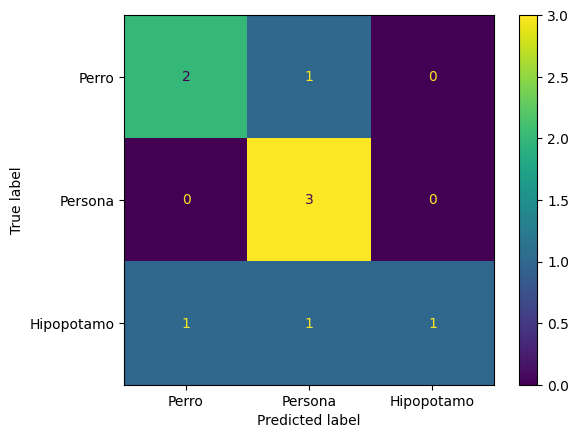

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.display_labels = ['Perro','Persona','Hipopotamo']
disp.plot()

In [23]:
y_test

array([0, 2, 2, 1, 0, 1, 2, 0, 1])

In [24]:
y_pred

array([1, 2, 0, 1, 0, 1, 1, 0, 1], dtype=int64)

In [25]:
X_test[2]

array([[[0.47843137, 0.45490196, 0.37254902],
        [0.47843137, 0.45098039, 0.38431373],
        [0.48235294, 0.45490196, 0.34509804],
        ...,
        [0.64313725, 0.72941176, 0.4745098 ],
        [0.65490196, 0.74117647, 0.48627451],
        [0.6745098 , 0.74901961, 0.49019608]],

       [[0.4745098 , 0.45098039, 0.38039216],
        [0.47843137, 0.44705882, 0.38823529],
        [0.48235294, 0.44705882, 0.35686275],
        ...,
        [0.65490196, 0.73333333, 0.49019608],
        [0.66666667, 0.74901961, 0.49803922],
        [0.67843137, 0.75686275, 0.49019608]],

       [[0.4745098 , 0.45098039, 0.37254902],
        [0.48235294, 0.45490196, 0.37647059],
        [0.47843137, 0.45098039, 0.36862745],
        ...,
        [0.67058824, 0.74117647, 0.49411765],
        [0.6745098 , 0.75294118, 0.49803922],
        [0.6745098 , 0.75294118, 0.48235294]],

       ...,

       [[0.50196078, 0.55686275, 0.32941176],
        [0.4745098 , 0.52941176, 0.31372549],
        [0.44705882, 0

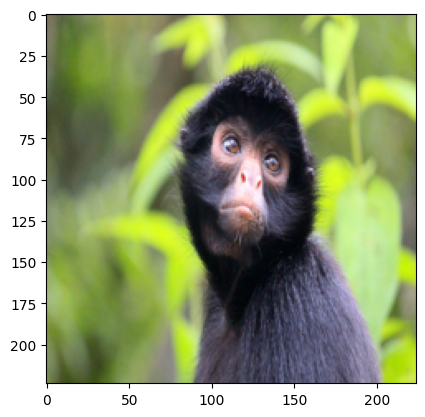

In [26]:
import matplotlib.pyplot as plt
img_array = (X_test[2] * 255).astype(np.uint8)  # escala de 0-255 y conversion a 8-bit integer
img = Image.fromarray(img_array)
plt.imshow(img)

In [27]:
import numpy as np
from tkinter import filedialog
from PIL import Image

# Abrir cuadro de diálogo para seleccionar múltiples imágenes
rutas_imagenes = filedialog.askopenfilenames(
    title="Seleccionar imágenes",
    filetypes=[("Imágenes", "*.png *.jpg")],
)

print(f"Has seleccionado {len(rutas_imagenes)} imágenes")

# Lista para almacenar las imágenes preprocesadas
imagenes_procesadas = []

# Procesar cada imagen seleccionada
for ruta_imagen in rutas_imagenes:
    img = Image.open(ruta_imagen)
    img = img.resize((224, 224))  # Redimensionar la imagen al tamaño esperado por el modelo
    img_array = np.array(img) / 255.0  # Normalizar la imagen (de 0 a 1)
    img_array = np.expand_dims(img_array, axis=0)  # Añadir dimensión para lotes (1, 224, 224, 3)
    imagenes_procesadas.append(img_array)

# Convertir la lista de imágenes a un array numpy (n_imagenes, 224, 224, 3)
imagenes_procesadas = np.vstack(imagenes_procesadas)

# Hacer predicciones para todas las imágenes en lote
predicciones = model.predict(imagenes_procesadas)

# Clases correspondientes (ajusta según las clases de tu modelo)
clases = ['Perro', 'Persona', 'Mono']

# Decodificar y mostrar las predicciones para todas las imágenes
for i, prediccion in enumerate(predicciones):
    y_pred = np.argmax(prediccion)  # Obtener la clase con mayor probabilidad
    print(f"Predicción para imagen {i+1}: {clases[y_pred]}")
    print(ruta_imagen)


Has seleccionado 1 imágenes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicción para imagen 1: Perro
C:/Users/mrpic/Downloads/perroDogge_Odin.jpg
